<a href="https://colab.research.google.com/github/zephyrowwa/CPE-311/blob/main/CALAMBA_Hands_on_Activity_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.1 : Introduction to Machine Learning

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements.

Import the libraries and the dataset

In [ ]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('Iris_Data.csv')
#check the content of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:
* The number of data points (rows).
* The column names.
* The data types for each column.

In [ ]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [ ]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:
* The number of each species present.
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [ ]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [ ]:
# The mean calculation
data.groupby('species').mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

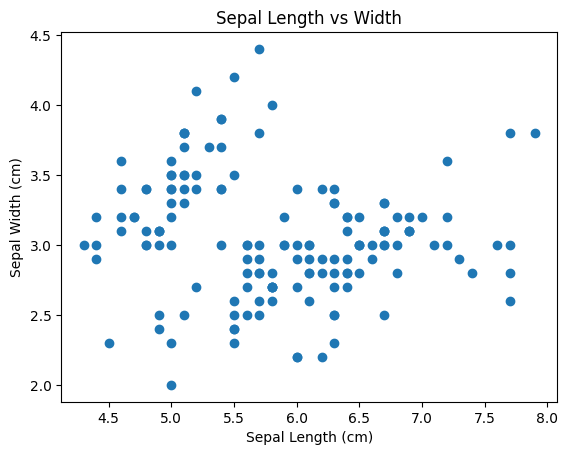

In [ ]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot.

- *There are like 3 distinct groups in the scatterplot which corresponds to the 3 species of the Iris flower, and each group has their own plots corresponding to their features.*
- *There are notable outliers in the scatterplot.*

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

- *to show the frequency of the different petal lengths of the Irises*

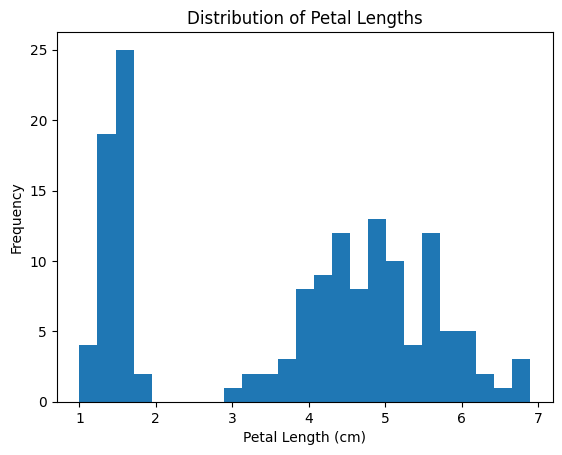

In [ ]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot?

- *it gives the summary of the distribution of the data, each boxes are the different species and their medians, range, and outliers.*

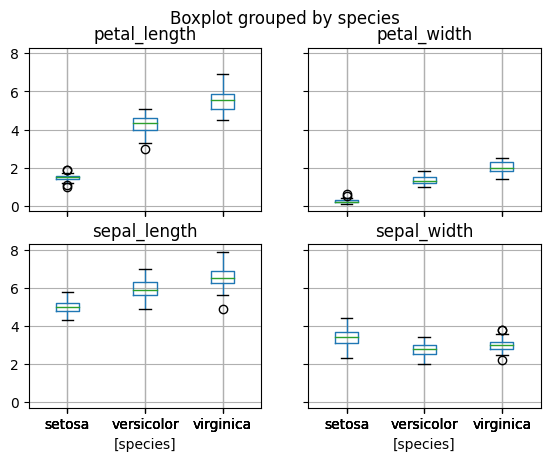

In [ ]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [ ]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


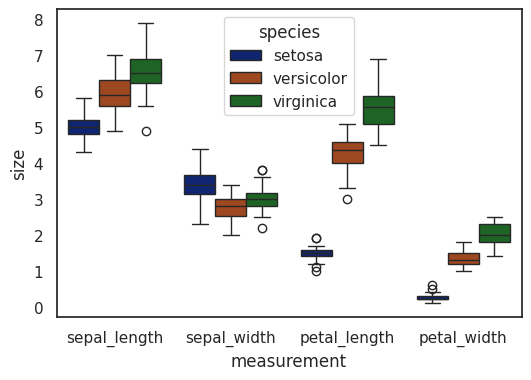

In [ ]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

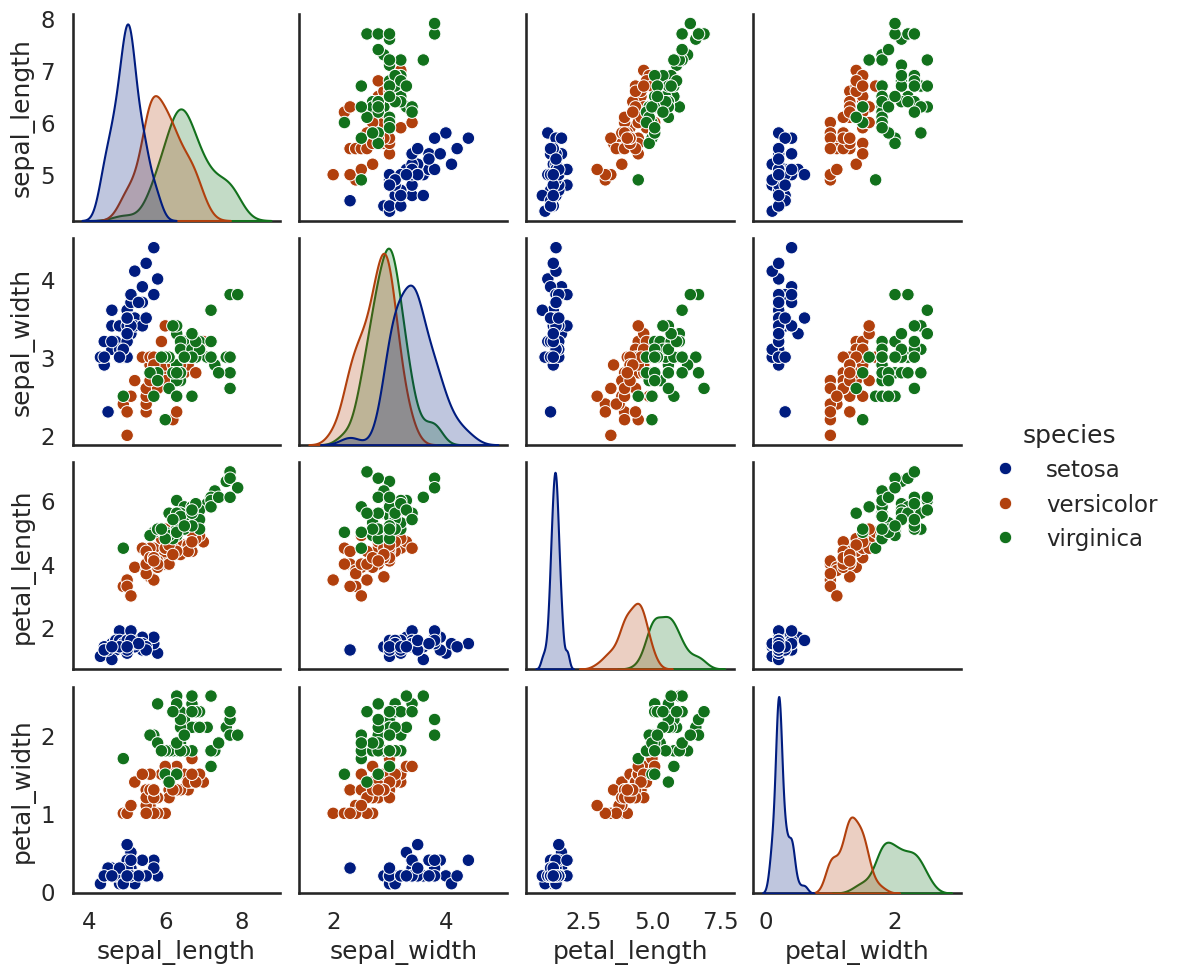

In [ ]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



Interpret the result of correlation using the pairplot

- there is a strong positive correlation between petal length and width; if the petal is long, it tends to be wide too, especially for veriscolor and virginica
- sepal length and width has a wek positive correlation, which can mean that longer sepals tend to have narrow petals.

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

dataset used:

**Most Streamed Songs (All Time)[Spotify]**

https://www.kaggle.com/datasets/amaanansari09/most-streamed-songs-all-time

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sp = pd.read_csv('/content/Streams.csv')
sp

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,06-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17
...,...,...,...,...
95,7 Years,Lukas Graham,1.529,16-Jun-15
96,Yellow,Coldplay,1.527,26-Jun-00
97,Sugar,Maroon 5,1.524,29-Aug-14
98,Despacito,Luis Fonsi featuring Daddy Yankee,1.522,12-Jan-17


In [ ]:
ft = pd.read_csv('/content/Features.csv')
ft

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5kqIPrATaCc2LqxVWzQGbk,7 Years,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765
96,3AJwUDP919kvQ9QcozQPxg,Yellow,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429
97,6UelLqGlWMcVH1E5c4H7lY,Sugar,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548
98,6habFhsOp2NvshLv26DqMb,Despacito,3.82,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655


In [ ]:
spn = sp.drop(columns=['Release Date','Song', 'Artist'])
spn

,Streams (Billions)
0,3.449
1,3.398
2,2.770
3,2.680
4,2.620
...,...
95,1.529
96,1.527
97,1.524
98,1.522


In [ ]:
ftn = ft.drop(columns=['id', 'loudness', 'mode','instrumentalness'])
ftn

,name,duration,energy,key,speechiness,acousticness,liveness,valence,tempo,danceability
0,Blinding Lights,3.33,0.730,1,0.0598,0.00146,0.0897,0.334,171.005,0.514
1,Shape of You,3.90,0.652,1,0.0802,0.58100,0.0931,0.931,95.977,0.825
2,Dance Monkey,3.49,0.588,6,0.0924,0.69200,0.1490,0.513,98.027,0.824
3,Someone You Loved,3.04,0.405,1,0.0319,0.75100,0.1050,0.446,109.891,0.501
4,Rockstar,3.64,0.520,5,0.0712,0.12400,0.1310,0.129,159.801,0.585
...,...,...,...,...,...,...,...,...,...,...
95,7 Years,3.96,0.473,10,0.0514,0.28700,0.3910,0.340,119.992,0.765
96,Yellow,4.45,0.661,11,0.0281,0.00239,0.2340,0.285,173.372,0.429
97,Sugar,2.90,0.816,0,0.0465,0.12200,0.3350,0.557,95.390,0.548
98,Despacito,3.82,0.797,2,0.1530,0.19800,0.0670,0.839,177.928,0.655


In [ ]:
spsd = ftn.join(spn)
spsd

,name,duration,energy,key,speechiness,acousticness,liveness,valence,tempo,danceability,Streams (Billions)
0,Blinding Lights,3.33,0.730,1,0.0598,0.00146,0.0897,0.334,171.005,0.514,3.449
1,Shape of You,3.90,0.652,1,0.0802,0.58100,0.0931,0.931,95.977,0.825,3.398
2,Dance Monkey,3.49,0.588,6,0.0924,0.69200,0.1490,0.513,98.027,0.824,2.770
3,Someone You Loved,3.04,0.405,1,0.0319,0.75100,0.1050,0.446,109.891,0.501,2.680
4,Rockstar,3.64,0.520,5,0.0712,0.12400,0.1310,0.129,159.801,0.585,2.620
...,...,...,...,...,...,...,...,...,...,...,...
95,7 Years,3.96,0.473,10,0.0514,0.28700,0.3910,0.340,119.992,0.765,1.529
96,Yellow,4.45,0.661,11,0.0281,0.00239,0.2340,0.285,173.372,0.429,1.527
97,Sugar,2.90,0.816,0,0.0465,0.12200,0.3350,0.557,95.390,0.548,1.524
98,Despacito,3.82,0.797,2,0.1530,0.19800,0.0670,0.839,177.928,0.655,1.522


In [ ]:
print('num of datapoints:\n',spsd.shape[0],'\n')

print('columns:\n',spsd.columns.tolist(),'\n')

print('data types:\n',spsd.dtypes,'\n')

num of datapoints:
 100 

columns:
 ['name', 'duration', 'energy', 'key', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'danceability', 'Streams (Billions)'] 

data types:
 name                   object
duration              float64
energy                float64
key                     int64
speechiness           float64
acousticness          float64
liveness              float64
valence               float64
tempo                 float64
danceability          float64
Streams (Billions)    float64
dtype: object 



In [ ]:
#the number of each species present
spsd.name.value_counts()

# the mean, median and quartiles and ranges
stats_df = spsd.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,duration,energy,key,speechiness,acousticness,liveness,valence,tempo,danceability,Streams (Billions)
mean,3.6353,0.62550,5.34,0.096448,0.260955,0.165682,0.502032,121.2539,0.64963,1.8960
25%,3.1225,0.52375,2.00,0.041200,0.026150,0.094300,0.340750,98.0220,0.54800,1.6470
median,3.5050,0.64000,6.00,0.059400,0.162500,0.114000,0.492000,116.8640,0.67150,1.7705
75%,4.0300,0.74100,8.25,0.106000,0.431500,0.217000,0.663000,142.4395,0.75925,2.0460
range,5.5300,0.72700,11.00,0.409900,0.944974,0.755600,0.907800,111.1060,0.58100,1.9280


In [ ]:
spsd.groupby('name').mean()

,duration,energy,key,speechiness,acousticness,liveness,valence,tempo,danceability,Streams (Billions)
name,,,,,,,,,,
'Till I Collapse,4.96,0.847,1.0,0.1860,0.062200,0.0816,0.100,171.447,0.548,1.579
7 Rings,2.98,0.317,1.0,0.3340,0.592000,0.0881,0.327,140.048,0.778,1.924
7 Years,3.96,0.473,10.0,0.0514,0.287000,0.3910,0.340,119.992,0.765,1.529
All of Me,4.49,0.264,8.0,0.0322,0.922000,0.1320,0.331,119.930,0.422,1.973
As It Was,2.79,0.731,6.0,0.0557,0.342000,0.3110,0.662,173.930,0.520,2.012
...,...,...,...,...,...,...,...,...,...,...
Watermelon Sugar,2.90,0.816,0.0,0.0465,0.122000,0.3350,0.557,95.390,0.548,2.140
Without Me,4.84,0.669,7.0,0.0738,0.002860,0.2370,0.662,112.238,0.908,1.692
Wonderwall,4.31,0.893,2.0,0.0406,0.000509,0.1870,0.434,174.323,0.375,1.593


In [ ]:
spsd.groupby('name').median()

,duration,energy,key,speechiness,acousticness,liveness,valence,tempo,danceability,Streams (Billions)
name,,,,,,,,,,
'Till I Collapse,4.96,0.847,1.0,0.1860,0.062200,0.0816,0.100,171.447,0.548,1.579
7 Rings,2.98,0.317,1.0,0.3340,0.592000,0.0881,0.327,140.048,0.778,1.924
7 Years,3.96,0.473,10.0,0.0514,0.287000,0.3910,0.340,119.992,0.765,1.529
All of Me,4.49,0.264,8.0,0.0322,0.922000,0.1320,0.331,119.930,0.422,1.973
As It Was,2.79,0.731,6.0,0.0557,0.342000,0.3110,0.662,173.930,0.520,2.012
...,...,...,...,...,...,...,...,...,...,...
Watermelon Sugar,2.90,0.816,0.0,0.0465,0.122000,0.3350,0.557,95.390,0.548,2.140
Without Me,4.84,0.669,7.0,0.0738,0.002860,0.2370,0.662,112.238,0.908,1.692
Wonderwall,4.31,0.893,2.0,0.0406,0.000509,0.1870,0.434,174.323,0.375,1.593


In [ ]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in spsd.columns if field != 'name'}
agg_dict['Streams (Billions)'] = 'max'
pprint(agg_dict)
spsd.groupby('name').agg(agg_dict)

{'Streams (Billions)': 'max',
 'acousticness': ['mean', 'median'],
 'danceability': ['mean', 'median'],
 'duration': ['mean', 'median'],
 'energy': ['mean', 'median'],
 'key': ['mean', 'median'],
 'liveness': ['mean', 'median'],
 'speechiness': ['mean', 'median'],
 'tempo': ['mean', 'median'],
 'valence': ['mean', 'median']}


duration        energy          key        speechiness  \
                     mean median   mean median  mean median        mean   
name                                                                      
'Till I Collapse     4.96   4.96  0.847  0.847   1.0    1.0      0.1860   
7 Rings              2.98   2.98  0.317  0.317   1.0    1.0      0.3340   
7 Years              3.96   3.96  0.473  0.473  10.0   10.0      0.0514   
All of Me            4.49   4.49  0.264  0.264   8.0    8.0      0.0322   
As It Was            2.79   2.79  0.731  0.731   6.0    6.0      0.0557   
...                   ...    ...    ...    ...   ...    ...         ...   
Watermelon Sugar     2.90   2.90  0.816  0.816   0.0    0.0      0.0465   
Without Me           4.84   4.84  0.669  0.669   7.0    7.0      0.0738   
Wonderwall           4.31   4.31  0.893  0.893   2.0    2.0      0.0406   
XO Tour Llif3        3.05   3.05  0.750  0.750  11.0   11.0      0.2310   
Yellow               4.45   4.45  0.661  0.661  11.0   11.0      0.0281   

                         acousticness           liveness         valence  \
                  median         mean    median     mean  median    mean   
name                                                                       
'Till I Collapse  0.1860     0.062200  0.062200   0.0816  0.0816   0.100   
7 Rings           0.3340     0.592000  0.592000   0.0881  0.0881   0.327   
7 Years           0.0514     0.287000  0.287000   0.3910  0.3910   0.340   
All of Me         0.0322     0.922000  0.922000   0.1320  0.1320   0.331   
As It Was         0.0557     0.342000  0.342000   0.3110  0.3110   0.662   
...                  ...          ...       ...      ...     ...     ...   
Watermelon Sugar  0.0465     0.122000  0.122000   0.3350  0.3350   0.557   
Without Me        0.0738     0.002860  0.002860   0.2370  0.2370   0.662   
Wonderwall        0.0406     0.000509  0.000509   0.1870  0.1870   0.434   
XO Tour Llif3     0.2310     0.002640  0.002640   0.1090  0.1090   0.401   
Yellow            0.0281     0.002390  0.002390   0.2340  0.2340   0.285   

                           tempo          danceability         \
                 median     mean   median         mean median   
name                                                            
'Till I Collapse  0.100  171.447  171.447        0.548  0.548   
7 Rings           0.327  140.048  140.048        0.778  0.778   
7 Years           0.340  119.992  119.992        0.765  0.765   
All of Me         0.331  119.930  119.930        0.422  0.422   
As It Was         0.662  173.930  173.930        0.520  0.520   
...                 ...      ...      ...          ...    ...   
Watermelon Sugar  0.557   95.390   95.390        0.548  0.548   
Without Me        0.662  112.238  112.238        0.908  0.908   
Wonderwall        0.434  174.323  174.323        0.375  0.375   
XO Tour Llif3     0.401  155.096  155.096        0.732  0.732   
Yellow            0.285  173.372  173.372        0.429  0.429   

                 Streams (Billions)  
                                max  
name                                 
'Till I Collapse              1.579  
7 Rings                       1.924  
7 Years                       1.529  
All of Me                     1.973  
As It Was                     2.012  
...                             ...  
Watermelon Sugar              2.140  
Without Me                    1.692  
Wonderwall                    1.593  
XO Tour Llif3                 1.847  
Yellow                        1.527  

[100 rows x 19 columns]

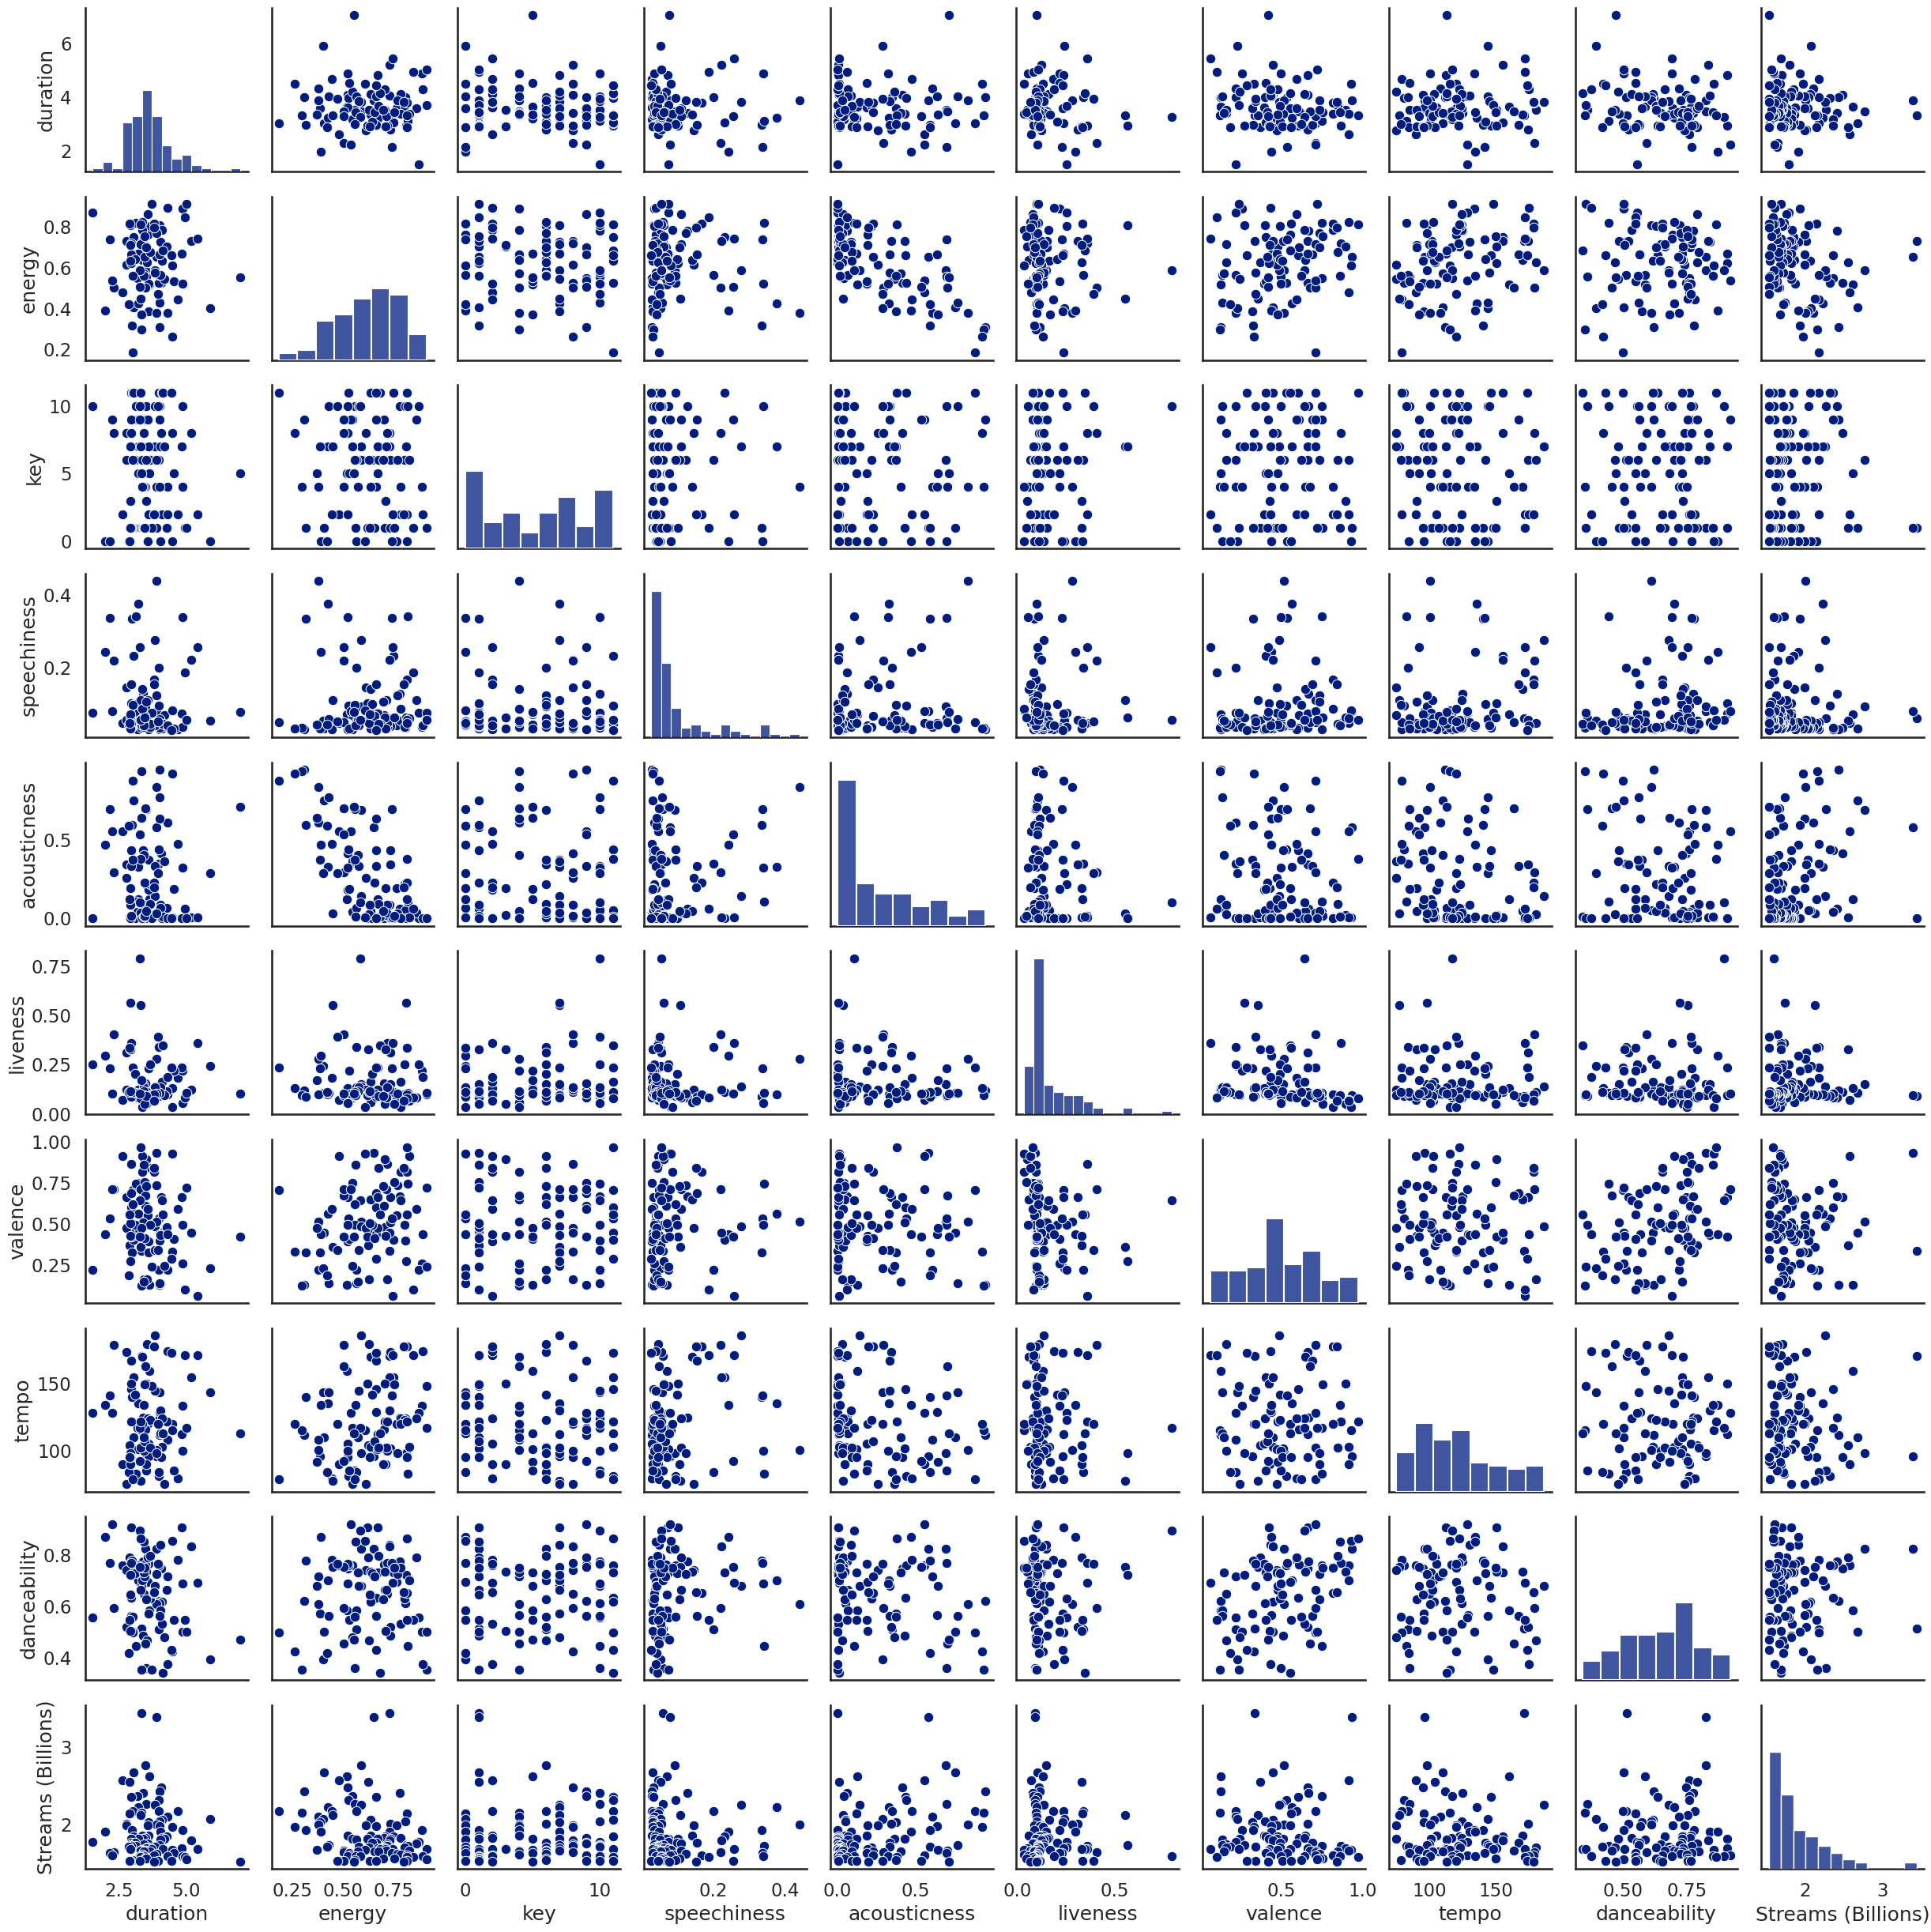

In [ ]:
import seaborn as sns
sns.pairplot(spsd);

Conclusion:

- THIS HOA WAS LIKE A REVIEW FOR ME, IT MADE ME LOOK BACK AT THE PREVIOUS HOAS IN DATA SCI 1, THIS ACTIVITY AS A WHOLE IS GOING TO BE REALLY HELPFUL WHEN WE ARE NOW TRAINING A MODEL.